In [13]:
import tensorflow as tf
import tensorflow_io as tfio
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from IPython import display

In [14]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [15]:
testing_file_name = '../data/xeno-canto/Luscinia megarhynchos/19660.mp3'

print(testing_file_name)

../data/xeno-canto/Luscinia megarhynchos/19660.mp3


In [16]:
def load_mp3(filename):
    file_content = tf.io.read_file(testing_file_name)
    wav = tfio.audio.decode_mp3(file_content)
    wav = tf.squeeze(wav, axis=1)
    sample_rate = tfio.audio.AudioIOTensor(testing_file_name, dtype=tf.float32).rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

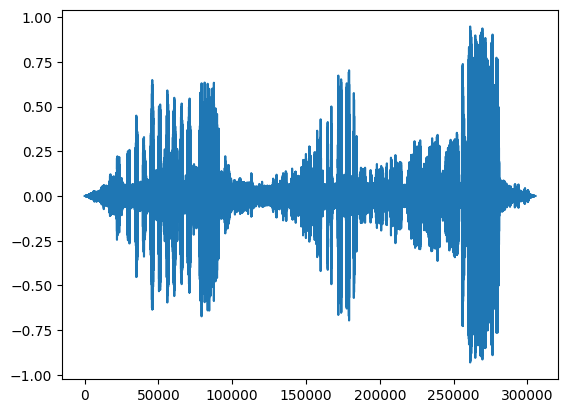

In [18]:
wav = load_mp3(testing_file_name)
plt.plot(wav)
display.Audio(wav, rate=16000)